<a href="https://colab.research.google.com/github/ZacharyXue/Code-Backup/blob/main/%E5%86%B3%E7%AD%96%E6%A0%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 决策树基本概念


决策树可以被认为是if-then规则的集合，是通过树结构来进行决策判断。

决策树算法的过程包括特征选择、决策树生成和决策树的剪枝。

## 优缺点
优点：计算复杂度不高，输出结果易理解，对中间值缺示不敏感，可以处理不相关特征数据；

缺点：可能会产生过度匹配问题。

## 特征选择




### 1. 信息增益

**熵**(entropy)是度量样本集合纯度最常用的一种指标。设$X$是一个取有限个值得离散随机变量，其概率分布是：
$$P(X=x_i)=p_i,\qquad i = 1,2,...,n
$$
则$X$的信息熵定义为
$$H(X)=-\sum_{i=1}^n p_i log_2 p_i
$$
$H(X)$的值越小，$X$的不确定就越小，纯度就越高。

**条件熵**(conditional entropy)$H(Y|X)$表示在已知随机变量$X$的条件下随机变量$Y$的不确定性。可以定义为
$$H(Y|X)=\sum_{i=1}^np_iH(Y|X=x_i)
$$
其中，$p_i=P(X=x_i),i=1,2,...,n$。

**信息增益**(information gain) 指的是得知特征$X$的信息而使得类$Y$的信息不确定性减少的程度。特征$A$对于训练数据集$D$的信息增益$g(D,A)$可以写为
$$g(D,A) = H(D)-H(D|A)
$$

> 更完整的公式推导见李航《统计学习方法》P72。

一般而言，信息增益越大，则意味着利用特征$A$进行划分获得的“纯度提升”越大。


### 2. 信息增益比

信息增益对于可取值数目比较多的属性有所偏好，为减少这种偏好可能带来的不利影响，C4.5决策树算法中不直接使用信息增益，而是使用**信息增益比**(information gain rate)进行划分。

特征$A$对数据集$D$的信息增益比$g_R(D,A)$定义为其信息增益$g(D,A)$与训练数据集$D$关于特征$A$的值的熵$H_A(D)$之比，即
$$g_R(D,A)=\frac{g(D,A)}{H_A(D)}
$$
其中，$H_A(D)=-\sum_{i=1}^n\frac{|D_i|}{|D|}log_2 \frac{|D_i|}{|D|}$，$n$是特征$A$取值的个数。

需要注意的是，信息增益比对于可取值数目比较少的属性有所偏好，因此C4.5算法中并不是直接使用信息增益比进行属性的划分，而是先从候选划分属性中找到信息增益高于平均水平的属性，再从中选取信息增益比最高的属性。

> 见周志华《机器学习》P78


### 3. 基尼指数

在CART决策树中使用**基尼指数**(Gini index)来进行属性的划分。

在分类问题中假设有K个类别，样本属于第k类的概率为$p_k$，则概率分布的基尼指数可以定义为：
$$Gini(p)=\sum_{k=1}^K p_k(1-p_k)=1-\sum_{k=1}^Kp_k^2
$$

对于给定样本集$D$，其基尼指数$Gini(D)=1-\sum_{k=1}^K(\frac{|C_k|}{|D|})^2$，其中$C_k$是$D$中属于第$k$类的样本子集，$K$是类的个数。

如果样本集$D$根据特征$A$是否取某一可能值$a$被分割为$D_1$和$D_2$，则在特征$A$的条件下，集合$D$的基尼指数定义为
$$Gini(D,A)=\frac{|D_1|}{|D|}Gini(D_1)+\frac{|D_2|}{|D|}Gini(D_2)
$$

基尼指数数值越大，样本集合的不确定也就越大，这和之前的熵相同。

## 决策树的生成

三种不同的决策树主要区别在于使用的划分准则不同，停止的依据基本相同：结点中样本数小于预定阈值，或划分准则值小于阈值，或者没有更多特征。

### 1. ID3算法

ID3算法的核心是在决策树各个节点上应用信息增益准则进行选择特征，迭代构建决策树。具体做法是：从根节点开始，对结点计算所有可能的特征的信息增益，选择信息增益最大的特征作为结点的特征，由该特征的不同取值构建子结点；再对子结点递归调用以上方法，构建决策树。

### 2. C4.5算法

这里李航的《统计学习方法》中介绍是将特征选择的标准换为信息增益比，这和和周志华《机器学习》中有些出入。

周志华《机器学习》中的讲解是：先从候选划分属性中找到信息增益高于平均水平的属性，再从中选择增益率最高的。

### 3. CART算法

这里只记录CART分类树，回归树看李航《统计学习方法》P81.

CART分类树是计算现有特征对数据集的基尼指数，然后选择基尼指数最小的特征作为最优特征进行切分，然后进行迭代至满足停止条件。

## 决策树的剪枝

周志华《机器学习》中讲述的不论预剪枝还是后剪枝，思路都是利用验证集对决策树进行泛化性能的优化。

而在李航《统计学习方法》中对侧重的是对于损失函数的优化。而其损失函数为$C_\alpha(T)=C(T)+\alpha|T|$，其中第一项为训练数据的预测误差（例如基尼指数等），后一项为子树结点个数。


# 决策树的构建

In [ ]:
from collections import Counter
import numpy as np
import pandas as pd
# import operator

## 测试数据集

In [ ]:
def createDataSet():
    dataSet = [[0, 0, 0, 0, 'no'],         #数据集
            [0, 0, 0, 1, 'no'],
            [0, 1, 0, 1, 'yes'],
            [0, 1, 1, 0, 'yes'],
            [0, 0, 0, 0, 'no'],
            [1, 0, 0, 0, 'no'],
            [1, 0, 0, 1, 'no'],
            [1, 1, 1, 1, 'yes'],
            [1, 0, 1, 2, 'yes'],
            [1, 0, 1, 2, 'yes'],
            [2, 0, 1, 2, 'yes'],
            [2, 0, 1, 1, 'yes'],
            [2, 1, 0, 1, 'yes'],
            [2, 1, 0, 2, 'yes'],
            [2, 0, 0, 0, 'no']]
    labels = ['年龄', '有工作', '有自己的房子', '信贷情况']            
    return dataSet, labels                #返回数据集和分类属性

## 香农熵函数

In [ ]:
def calcShannonEnt(dataSet):
  numData = len(dataSet)
  d = Counter([data[-1] for data in dataSet]).most_common()
  prob = np.array([data[-1] for data in d],dtype=np.float32) / numData  
  return np.sum(-prob * np.log2(prob))

进行测试

In [ ]:
dataSet, features = createDataSet()
calcShannonEnt(dataSet)

0.9709506

## 信息增益

计算信息增益，首先要进行样本集的划分。

In [ ]:
def chooseBestFeatureToSplit(dataSet):
  numFeatures = len(dataSet[0])-1 # 这里减一的原因是dataSet最后一行是标签
  numData = len(dataSet)
  baseEntropy = calcShannonEnt(dataSet)
  bestInfoGain = 0.0                     
  bestFeature = -1  
  for i in range(numFeatures):
    featureVals = set([data[i] for data in dataSet])
    newEntropy = 0.0                                 
    for value in featureVals:
      # 原代码中使用了一个函数来实现该功能感觉没必要，
      # 现在唯一的区别是subDataSet未去掉特征i（在这里不影响）
      subDataSet = [data for data in dataSet if data[i]==value]
      prob = len(subDataSet) / numData
      newEntropy += prob * calcShannonEnt(subDataSet)
    infoGain = baseEntropy - newEntropy 
    # print("第%d个特征的增益为%.3f" % (i, infoGain))
    if (infoGain > bestInfoGain):                             
      bestInfoGain = infoGain                            
      bestFeature = i                                     
  return bestFeature    

In [ ]:
chooseBestFeatureToSplit(dataSet)

The feature values is {0, 1, 2}
第0个特征的增益为0.083
The feature values is {0, 1}
第1个特征的增益为0.324
The feature values is {0, 1}
第2个特征的增益为0.420
The feature values is {0, 1, 2}
第3个特征的增益为0.363


2

记录自己犯的一个简单错误：

开始的时候在获得某一特征值的集合时自己的写法是`set(dataSet[:][i])`，但实际上这个效果等同于`set(dataSet[i])`，自己有点把他等同于numpy数组之类的了。

In [ ]:
dataSet[:][1]

[0, 0, 0, 1, 'no']

## 创建决策树

这里首先的问题是当数据集已经处理了所有的属性，类标签依然不唯一。这种情况下通常会使用多数表决的方法决定该叶子节点的分类。

书中用到的operator函数：

[`operator.itemgetter(*items)`](https://docs.python.org/3/library/operator.html?highlight=operator%20itemgetter#operator.itemgetter)：Return a callable object that fetches item from its operand **using the operand’s `__getitem__()` method**. If multiple items are specified, returns a tuple of lookup values. For example:

- After f = itemgetter(2), the call f(r) returns r[2].

- After g = itemgetter(2, 5, 3), the call g(r) returns (r[2], r[5], r[3]).

但是我这里感觉直接用`Counter`更直接更简洁，不过为了和书中代码一致，还是把这个放在`majorityCnt()`函数中。

In [ ]:
def majorityCnt(classList):
  counts = Counter(classList)
  return counts.most_common(1)[0]

之后就可以创建决策树：

In [ ]:
def createTree(dataSet,labels):
  classList = [data[-1] for data in dataSet]
  # 当该结点元素只有一个分类时停止分类
  if classList.count(classList[0]) == len(classList):
    return classList[0]
  # 当所有特征均使用后则投票决定结点类别
  if len(dataSet[0]) == 1:
    return majorityCnt(classList)
  # 找到现阶段信息增益最大的特征
  bestFeat = chooseBestFeatureToSplit(dataSet)
  # 找到相应标签
  bestFeatLabel = labels[bestFeat]
  # 初始化树
  myTree = {bestFeatLabel:{}}
  del labels[bestFeat]
  # 找到该特征所有可能
  uniqueVals = set([data[bestFeat] for data in dataSet])
  for value in uniqueVals:
    # 创建子树的标签和数据集
    sublabels = labels[:]
    subdataSet = [data[:bestFeat]+data[bestFeat+1:] \
                  for data in dataSet if data[bestFeat]==value]
    myTree[bestFeatLabel][value] = createTree(subdataSet,sublabels)
  return myTree

注意创建树的过程，虽然看着简单，但是还是很有逻辑，需要注意的。

In [ ]:
dataSet, labels = createDataSet()
temp_labels = labels[:]
myTree = createTree(dataSet, temp_labels)
myTree

{'有自己的房子': {0: {'有工作': {0: 'no', 1: 'yes'}}, 1: 'yes'}}

# 决策树可视化

可视化需要用到的函数：

- getNumLeafs：获取决策树叶子结点的数目
- getTreeDepth：获取决策树的层数
- plotNode：绘制结点
- plotMidText：标注有向边属性值
- plotTree：绘制决策树
- createPlot：创建绘制面板

参考[机器学习实战教程（三）：决策树实战篇之为自己配个隐形眼镜](https://cuijiahua.com/blog/2017/11/ml_3_decision_tree_2.html)

In [ ]:
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import matplotlib as mpl
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
def getNumLeafs(myTree):
    numLeafs = 0  
    # python3中myTree.keys()返回的是dict_keys,不在是list,
    # 所以不能使用myTree.keys()[0]的方法获取结点属性，
    # 可以使用list(myTree.keys())[0]                                              
    firstStr = next(iter(myTree))                               
    secondDict = myTree[firstStr]                                
    for key in secondDict.keys():
        # 判断子结点是否包含其他子结点
        if type(secondDict[key]).__name__=='dict':                
            numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs

In [ ]:
def getTreeDepth(myTree):
    maxDepth = 0                                               
    firstStr = next(iter(myTree))                                
    secondDict = myTree[firstStr]                                
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':                
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth          
    return maxDepth

In [ ]:
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    arrow_args = dict(arrowstyle="<-")                                                
    createPlot.ax1.annotate(nodeTxt,xy=parentPt,xycoords='axes fraction',   
        xytext=centerPt,textcoords='axes fraction',
        va="center",ha="center",bbox=nodeType,arrowprops=arrow_args,
        FontProperties=zhfont)

In [ ]:
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]     
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

In [ ]:
def plotTree(myTree, parentPt, nodeTxt):
    decisionNode = dict(boxstyle="sawtooth", fc="0.8")  
    leafNode = dict(boxstyle="round4", fc="0.8")
    numLeafs = getNumLeafs(myTree)      
    depth = getTreeDepth(myTree)              
    firstStr = next(iter(myTree))                  
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)   
    plotMidText(cntrPt, parentPt, nodeTxt)         
    plotNode(firstStr, cntrPt, parentPt, decisionNode)  
    secondDict = myTree[firstStr] 
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD                                       
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':                
            plotTree(secondDict[key],cntrPt,str(key))
        else:                                     
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD

In [ ]:
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()                
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops) 
    plotTree.totalW = float(getNumLeafs(inTree))         
    plotTree.totalD = float(getTreeDepth(inTree))         
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;             
    plotTree(inTree, (0.5,1.0), '')                    
    plt.show() 

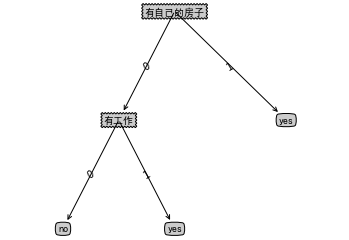

In [ ]:
createPlot(myTree)

matplot是真的不熟悉，之后一定要仔细看看。

# 决策树分类

In [ ]:
def classify(inputTree,featLabels,testVec):
  firstStr = next(iter(inputTree))
  print(firstStr)
  secondDict = inputTree[firstStr]
  featIndex = featLabels.index(firstStr)
  for key in secondDict.keys():
    if testVec[featIndex] == key:
      if type(secondDict[key]).__name__ == 'dict':
        classLabel = classify(secondDict[key],featLabels,testVec)
      else:
        classLabel = secondDict[key]
  return classLabel

In [ ]:
testVec = [0,1,0,0] 
classify(myTree, labels, testVec)

有自己的房子
有工作


'yes'

# 储存决策树

如果不对结果进行储存的话，每一次需要预测的时候都需要重新进行训练，这样很麻烦，故需要对于训练结果进行储存，之后便可以直接进行分类了。

`pickle`这个包之前也见过，[官方文档](https://docs.python.org/3/library/pickle.html?highlight=pickle#comparison-with-json)有关于pickle和json的对比，假如是我，我可能会选择json，pickle的优势在于可以保存非Python内置的类型。

In [ ]:
import pickle

def storeTree(inputTree, filename):
    with open(filename, 'wb') as fw:
        pickle.dump(inputTree, fw)

In [ ]:
storeTree(myTree, 'classifierStorage.txt')

In [ ]:
def grabTree(filename):
    fr = open(filename, 'rb')
    return pickle.load(fr)

In [ ]:
myTree = grabTree('classifierStorage.txt')

# sklearn中决策树预测隐形眼睛类型

原文链接：[机器学习实战教程（三）：决策树实战篇之为自己配个隐形眼镜](https://cuijiahua.com/blog/2017/11/ml_3_decision_tree_2.html)